<a href="https://colab.research.google.com/github/yootarou/CodeCraftHub/blob/main/Copy_of_Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.path.exists(
    "/content/drive/MyDrive/treaning/machine learning/2-30/deta-analysis/playground-series-s6e1/file/standardized_data.csv"
)

True

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import drive
import os

# パスの定義
csv_path = "/content/drive/MyDrive/treaning/machine learning/2-30/deta-analysis/playground-series-s6e1/file/standardized_data.csv"

if not os.path.exists(csv_path):
    print(f"エラー: 指定されたパスにファイルが見つかりません。パスを確認してください。\nパス: {csv_path}")
else:
    # xgboostのインポート確認
    try:
        from xgboost import XGBRegressor
        XGBOOST_AVAILABLE = True
    except ImportError:
        XGBOOST_AVAILABLE = False
        print("Warning: xgboost is not installed. XGBoost model will be skipped.")

    # データの読み込み
    df = pd.read_csv(csv_path)

    # 不要な列の削除
    if 'id' in df.columns:
        df = df.drop(columns=['id'])

    # ---------------------------------------------------------
    # 【修正箇所】欠損値処理：欠損がある行を削除
    # ---------------------------------------------------------
    initial_len = len(df)
    df = df.dropna()
    print(f"欠損値処理: {initial_len - len(df)} 行を削除しました。")
    print(f"現在のデータ行数: {len(df)}")
    # ---------------------------------------------------------

    # 特徴量と目的変数の定義
    feature_cols = [
        'age', 'study_hours', 'class_attendance', 'sleep_hours',
        'female', 'male', 'other',
        'b.com', 'b.sc', 'b.tech', 'ba', 'bba', 'bca', 'diploma',
        'no', 'yes',
        'average', 'good', 'poor',
        'coaching', 'group study', 'mixed', 'online videos', 'self-study',
        'high', 'low', 'medium',
        'easy', 'hard', 'moderate'
    ]
    target_col = 'exam_score'

    # 特徴量の抽出（存在確認付き）
    existing_features = [col for col in feature_cols if col in df.columns]

    if not existing_features:
        print("エラー: 指定された特徴量列がDataFrame内に一つも見つかりません。")
    elif target_col not in df.columns:
        print(f"エラー: 目的変数 '{target_col}' がDataFrame内に見つかりません。")
    else:
        X = df[existing_features]
        y = df[target_col]

        # --- 分割データの診断 ---
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.3, random_state=42
        )
        print(f"\nX_train shape: {X_train.shape}")

        # モデルの定義
        models = {
            "Linear Regression": LinearRegression(),
            "Ridge": Ridge(random_state=42),
            "Elastic Net": ElasticNet(random_state=42),
            "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
            "AdaBoost": AdaBoostRegressor(random_state=42, n_estimators=100),
            "Gradient Boosting": GradientBoostingRegressor(random_state=42, n_estimators=100)
        }

        if XGBOOST_AVAILABLE:
            models["XGBoost"] = XGBRegressor(random_state=42, n_estimators=100, verbosity=0)

        # 学習と評価
        print(f"\n{'Model Name':<25} | {'RMSE':<10} | {'R2 Score':<10}")
        print("-" * 50)
        results = {}

        for name, model in models.items():
            try:
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                rmse = np.sqrt(mean_squared_error(y_test, y_pred))
                r2 = r2_score(y_test, y_pred)
                results[name] = {'RMSE': rmse, 'R2': r2}
                print(f"{name:<25} | {rmse:<10.4f} | {r2:<10.4f}")
            except Exception as e:
                results[name] = {'RMSE': float('inf'), 'R2': None}
                print(f"{name:<25} | ERROR      | ERROR")
                print(f"  詳細エラー: {e}")

        # 最良モデルの表示
        if results:
            valid_results = {k: v for k, v in results.items() if v['RMSE'] != float('inf')}
            if valid_results:
                best_model_name = min(valid_results, key=lambda k: valid_results[k]['RMSE'])
                print("-" * 50)
                print(f"Best Model based on RMSE: {best_model_name}")
                print(f"Score: {valid_results[best_model_name]}")
            else:
                print("-" * 50)
                print("全てのモデルがエラーにより学習できませんでした。")

欠損値処理: 1 行を削除しました。
現在のデータ行数: 295841

X_train shape: (207088, 30)

Model Name                | RMSE       | R2 Score  
--------------------------------------------------
Linear Regression         | 8.8768     | 0.7799    
Ridge                     | 8.8768     | 0.7799    
Elastic Net               | 11.3026    | 0.6431    
Random Forest             | 9.1141     | 0.7679    
AdaBoost                  | 9.9745     | 0.7220    
Gradient Boosting         | 8.8446     | 0.7814    
XGBoost                   | 8.8375     | 0.7818    
--------------------------------------------------
Best Model based on RMSE: XGBoost
Score: {'RMSE': np.float64(8.837542108298429), 'R2': 0.78179628731876}


/tmp/ipython-input-3253619722.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


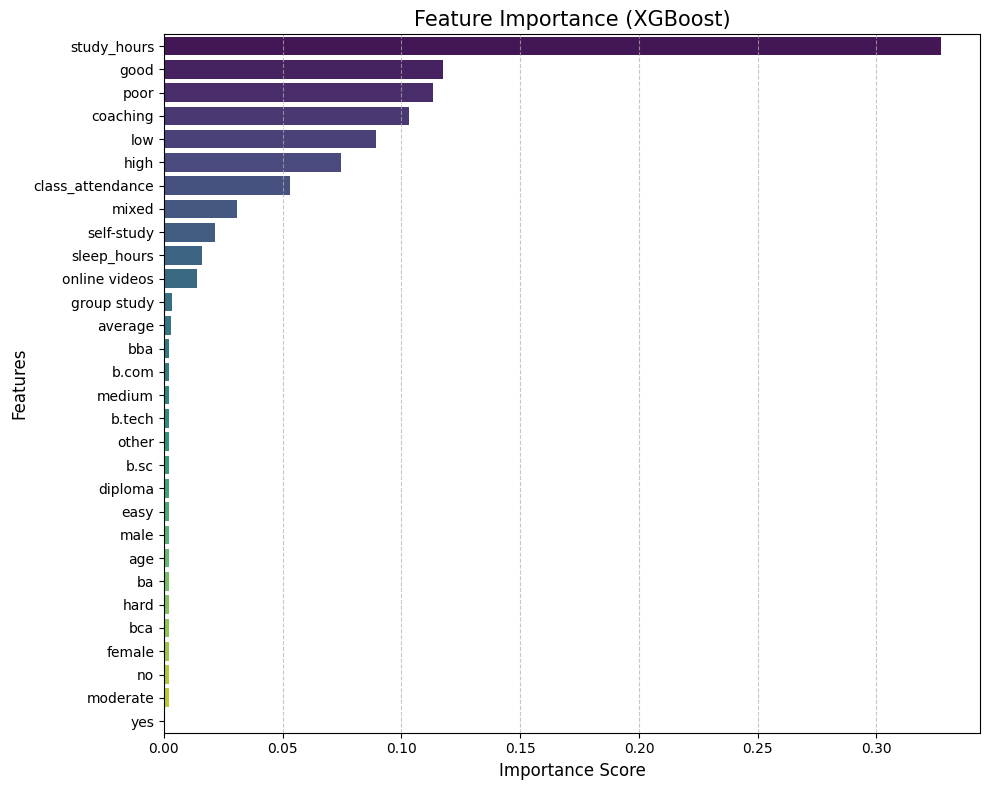


--- Top 5 Important Features ---
        Feature  Importance
1   study_hours    0.327228
17         good    0.117330
18         poor    0.113263
19     coaching    0.103135
25          low    0.089423


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------------
# 最良モデル（XGBoost）から特徴量重要度を取得
# ---------------------------------------------------------

# 前の手順で学習済みのXGBoostモデルを使用します
if "XGBoost" in models:
    best_model = models["XGBoost"]

    # 重要度の取得
    importances = best_model.feature_importances_

    # データフレーム化（特徴量名と重要度を対応付け）
    feature_importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': importances
    })

    # 重要度順にソート
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # ---------------------------------------------------------
    # グラフの描画
    # ---------------------------------------------------------
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')

    plt.title('Feature Importance (XGBoost)', fontsize=15)
    plt.xlabel('Importance Score', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # 上位5つの特徴量を数値で表示
    print("\n--- Top 5 Important Features ---")
    print(feature_importance_df.head(5))

else:
    print("XGBoostモデルが見つかりません。前の手順でXGBoostが正しく学習されているか確認してください。")